In [91]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
data = pd.read_csv('train.csv')

In [93]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA of 'data'

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

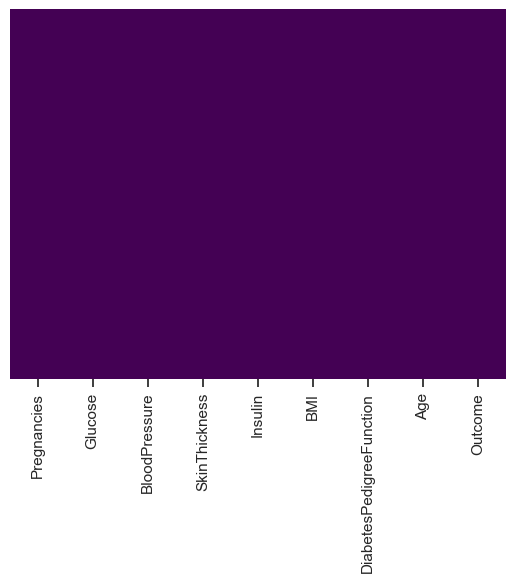

In [96]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Outcome', ylabel='count'>

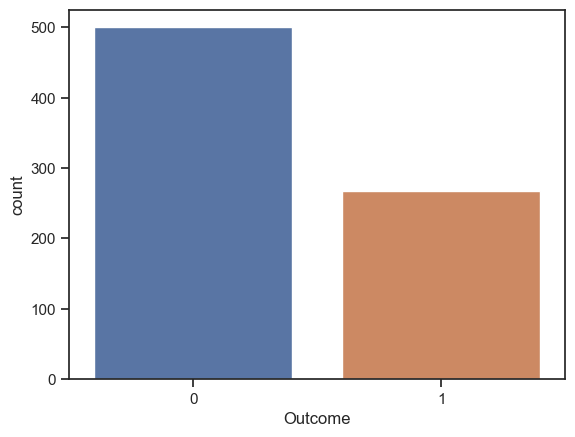

In [97]:
sns.countplot(x='Outcome', data=data)

/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_9982/3170268205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].dropna(),kde=True)


<Axes: xlabel='Age', ylabel='Density'>

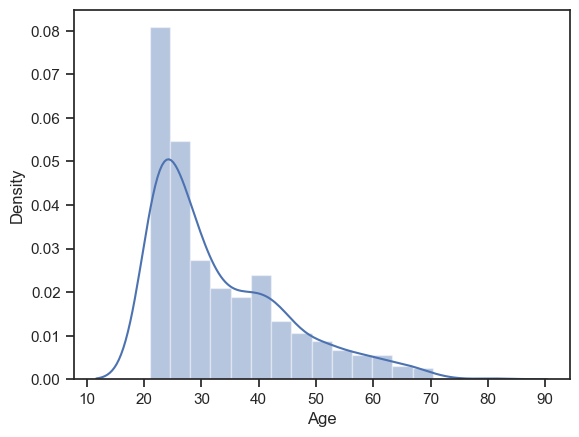

In [98]:
sns.distplot(data['Age'].dropna(),kde=True)

In [99]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


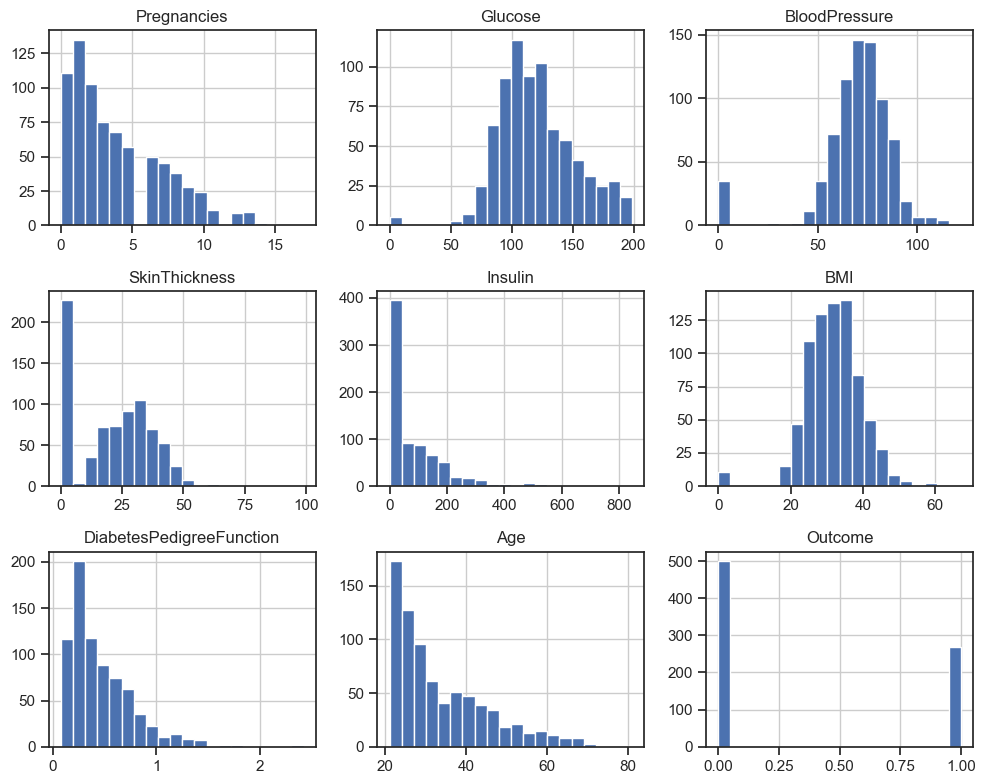

In [100]:
sns.set(style="ticks")
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

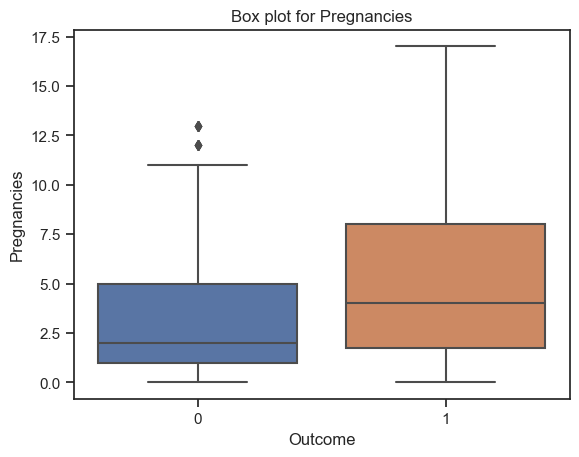

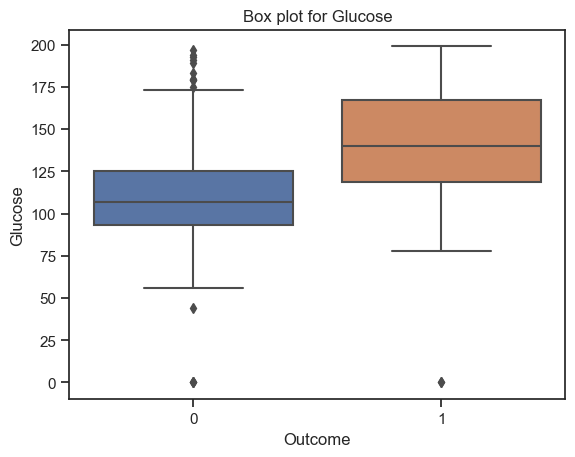

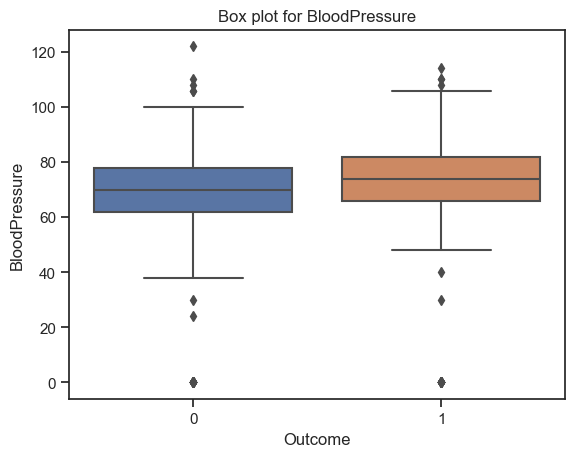

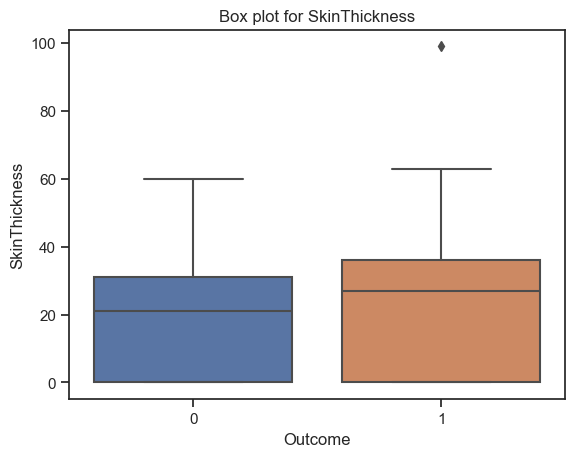

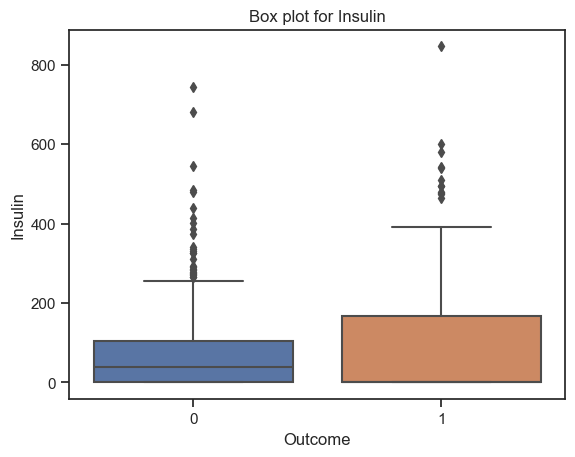

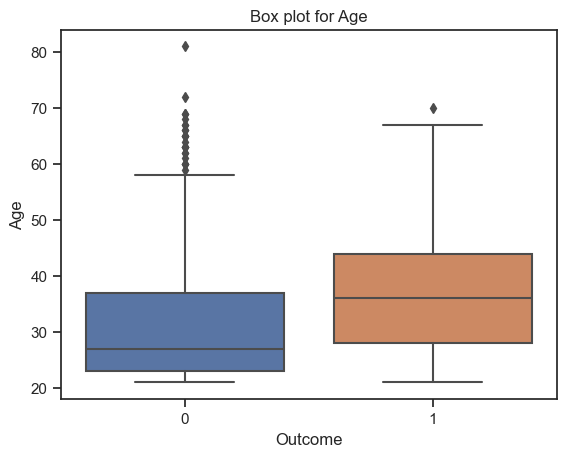

In [101]:
# Box plots
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']:
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Box plot for {column}')
    plt.xlabel('Outcome')
    plt.ylabel(column)
    plt.show()

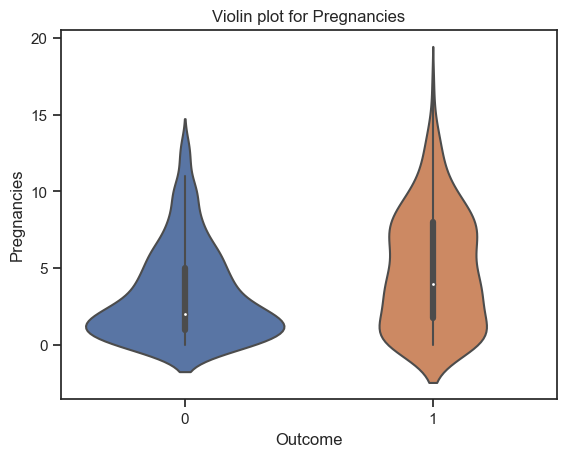

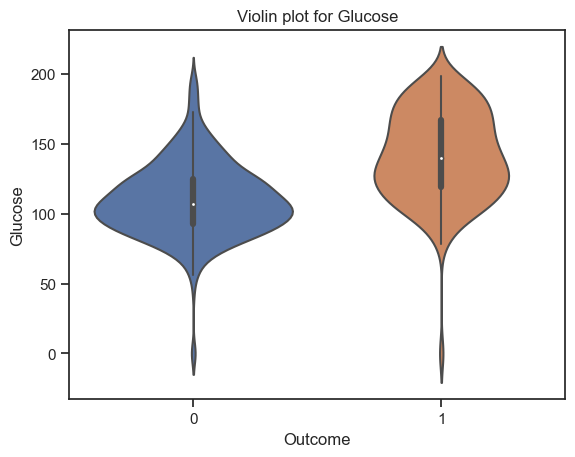

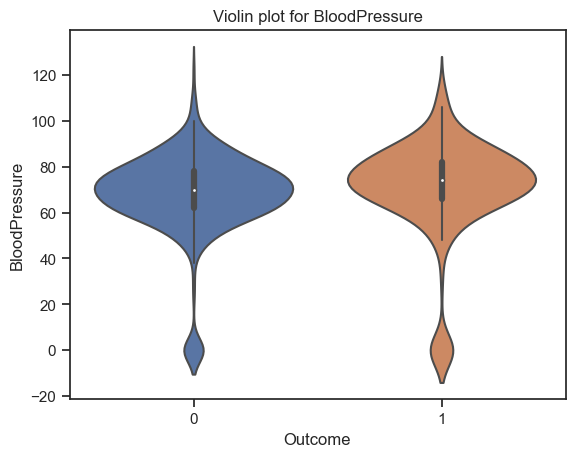

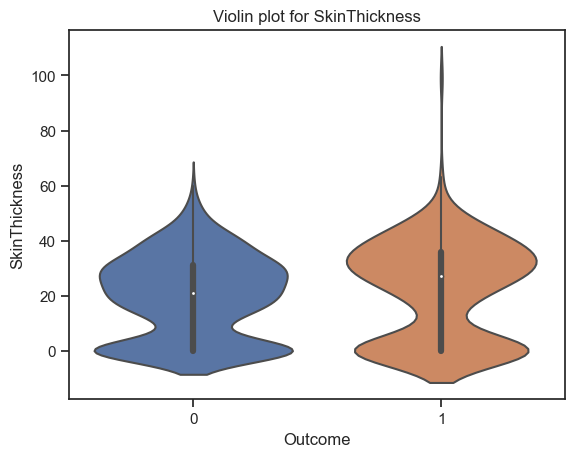

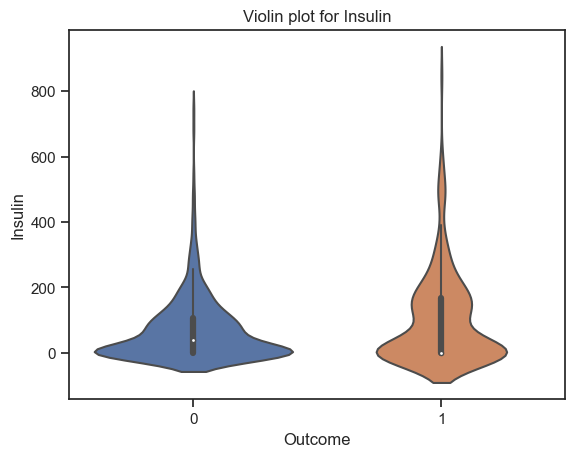

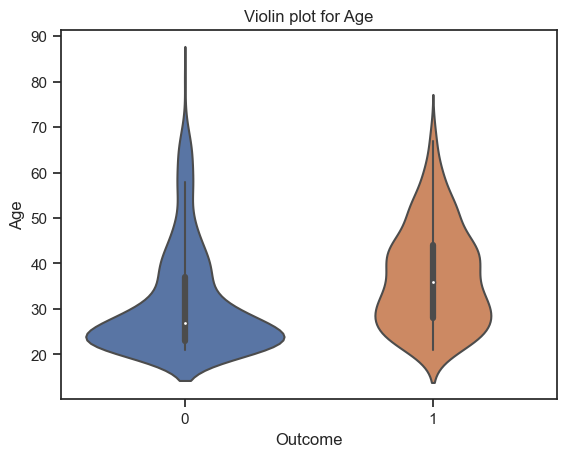

In [102]:
# Violin plots
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']:
    sns.violinplot(x='Outcome', y=column, data=data)
    plt.title(f'Violin plot for {column}')
    plt.xlabel('Outcome')
    plt.ylabel(column)
    plt.show()

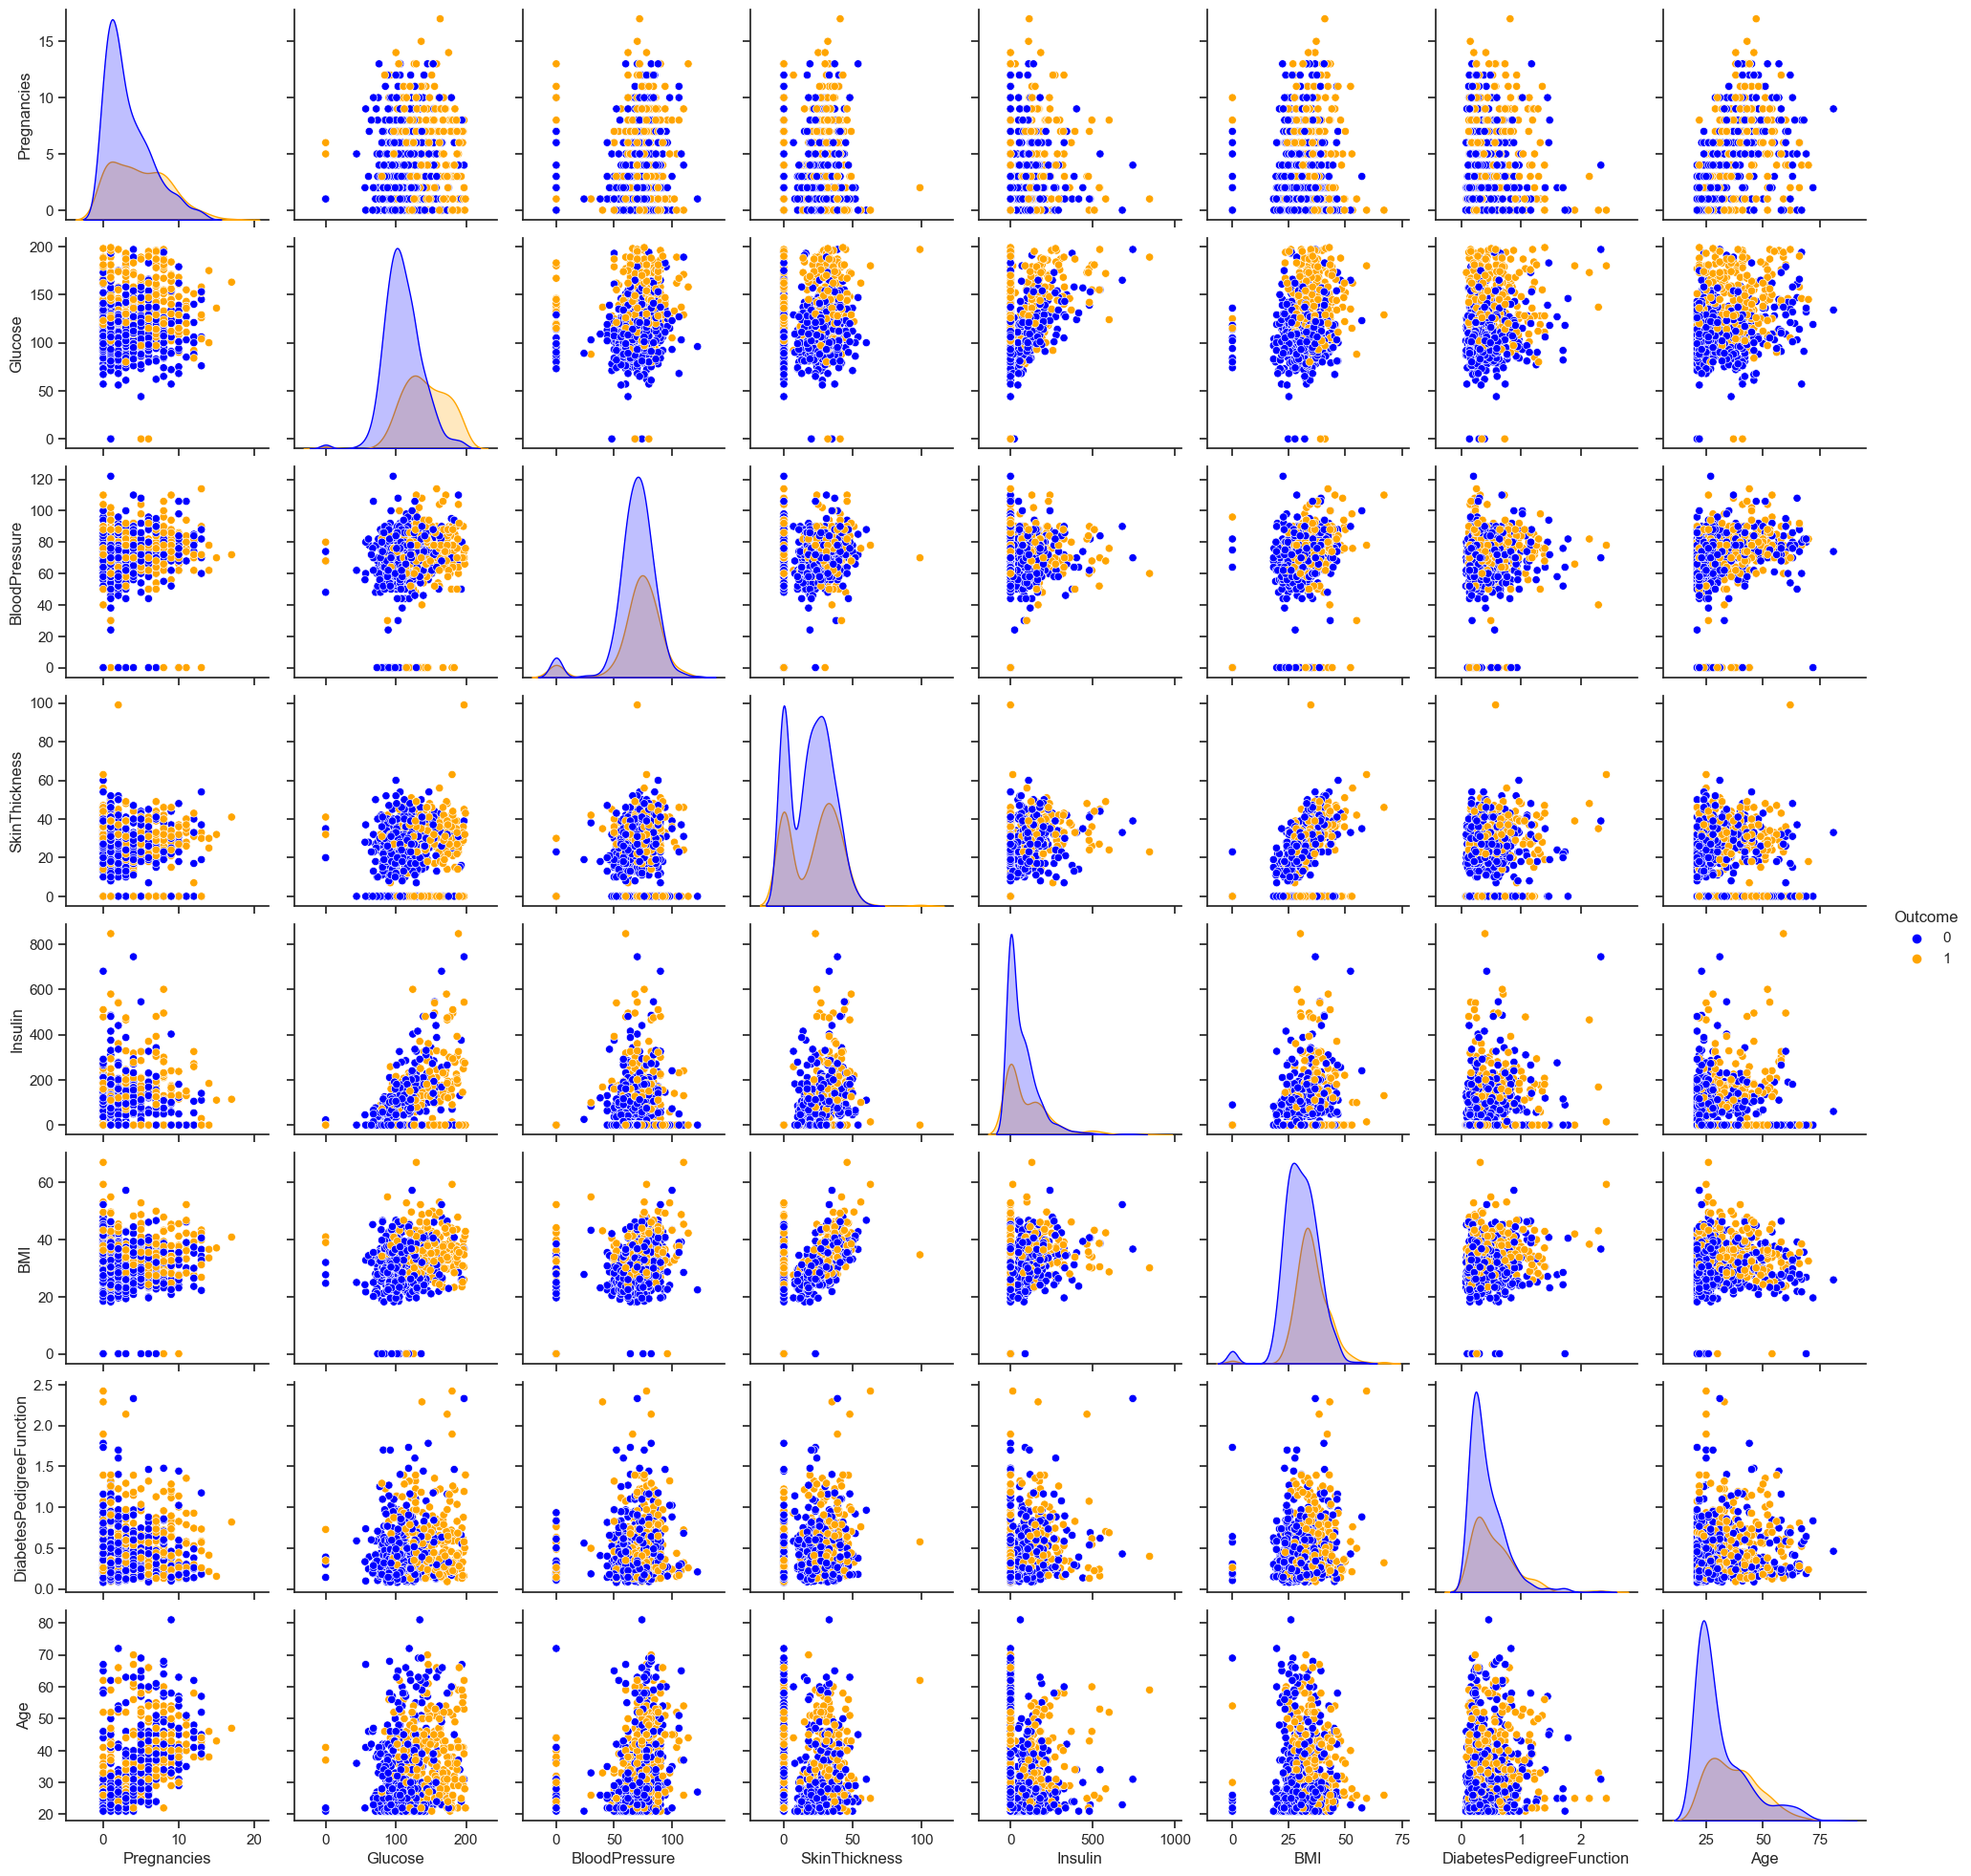

In [103]:
# Pair plots
sns.pairplot(data, hue="Outcome", palette={0: "blue", 1: "orange"})
plt.show()

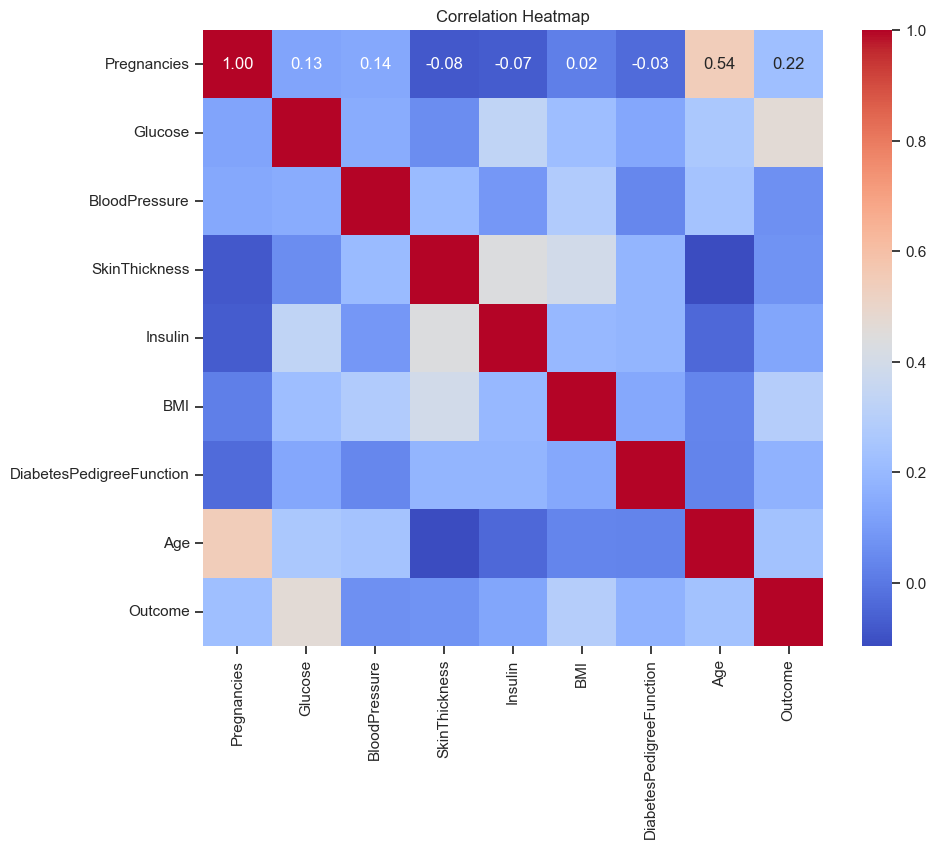

In [104]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

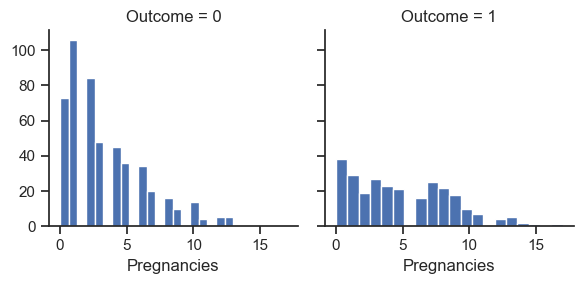

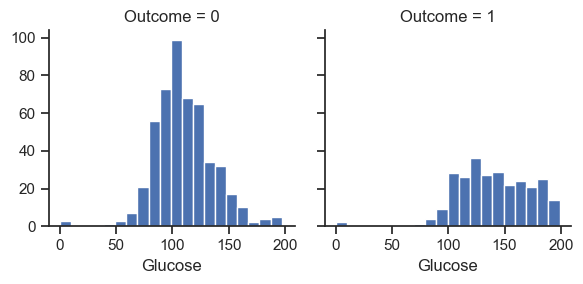

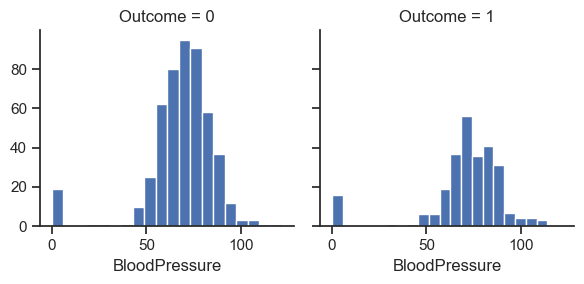

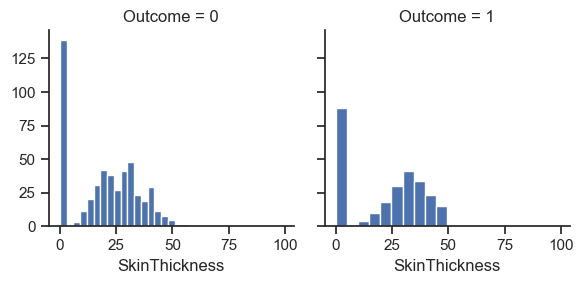

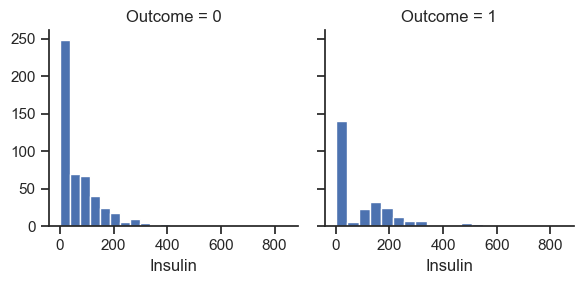

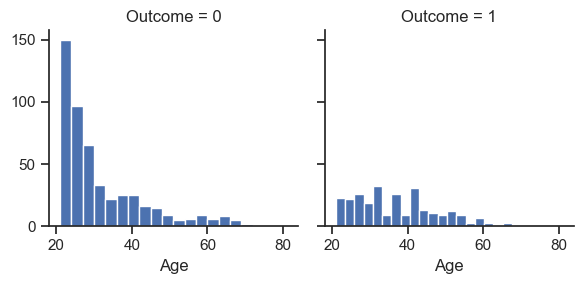

In [105]:
# Facet grid
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']:
    g = sns.FacetGrid(data, col='Outcome')
    g.map(plt.hist, column, bins=20)
    plt.show()

# Model: Logistic Regression

In [106]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,  random_state=101)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
model = LogisticRegression()

In [111]:
model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
predictions = model.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [114]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(classification_report(y_test, predictions))

Accuracy: 0.7922077922077922
Confusion Matrix:
[[133  17]
 [ 31  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[133,  17],
       [ 31,  50]])

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' contains your features and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SGD Classifier model with logistic loss
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Loss Function: perceptron")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Loss Function: perceptron
Accuracy: 0.5064935064935064
Confusion Matrix:
[[28 71]
 [ 5 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.28      0.42        99
           1       0.41      0.91      0.57        55

    accuracy                           0.51       154
   macro avg       0.63      0.60      0.50       154
weighted avg       0.69      0.51      0.48       154



In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' contains your features and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SGD Classifier model with logistic loss
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Loss Function: log_loss")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Loss Function: log_loss
Accuracy: 0.6493506493506493
Confusion Matrix:
[[98  1]
 [53  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.99      0.78        99
           1       0.67      0.04      0.07        55

    accuracy                           0.65       154
   macro avg       0.66      0.51      0.43       154
weighted avg       0.66      0.65      0.53       154



In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing steps and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('oversampler', RandomOverSampler()),  # Handle imbalanced data
    ('clf', SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))  # Classifier
])

# Define hyperparameters for grid search
param_grid = {
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__loss': ['log', 'hinge'],  # Try different loss functions
    'clf__penalty': ['l1', 'l2'],
    'clf__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.1 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Best Parameters: {'clf__alpha': 0.01, 'clf__learning_rate': 'optimal', 'clf__loss': 'hinge', 'clf__penalty': 'l2'}
Best Score: 0.7687191789950687
Accuracy: 0.7077922077922078
Confusion Matrix:
 [[69 30]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75        99
           1       0.57      0.73      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/imblearn/pipeline.py", line 326, in fit
    self._final_estimator.